Name : J Karan Tejas

Roll No : 191EE126

In [ ]:
import numpy as np
import IPython
from IPython.display import Audio , display, Javascript
import scipy
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks, chirp, spectrogram
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import pandas as pd
import base64
from google.colab import output
import control

In [ ]:
alpha = 1 + 126 % 3  
pi = np.pi

$\alpha = 1$

# Problem 1

In [205]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})

Part 1:

In [206]:
Fs=720

Wp = 10*2*np.pi
Ws = 20*2*np.pi

pass_ripple = alpha
stop_ripple = 40

wp = (2/T) * np.tan(Wp/(Fs*2))
ws = (2/T) * np.tan(Ws/(Fs*2))

N, wc=sp.buttord(wp, ws, pass_ripple, stop_ripple, analog=True)

print('Order filter: {}'.format(N))
print('Cutoff frequency (rad/sec):  {}'.format(wc))

b, a = sp.butter(N, wc, btype='low', analog=True, output='ba')

bd, ad=sp.bilinear(b, a, fs=Fs)

print(control.TransferFunction(bd, ad, dt=True))

Order filter: 8
Cutoff frequency (rad/sec):  68.41198399280967

2.034e-11 z^8 + 1.627e-10 z^7 + 5.696e-10 z^6 + 1.139e-09 z^5 + 1.424e-09 z^4 + 1.139e-09 z^3 + 5.696e-10 z^2 + 1.627e-10 z + 2.034e-11
---------------------------------------------------------------------------------------------------------------------------------------
                    z^8 - 7.513 z^7 + 24.71 z^6 - 46.47 z^5 + 54.64 z^4 - 41.14 z^3 + 19.37 z^2 - 5.215 z + 0.6145



Part 2:

<Figure size 720x720 with 0 Axes>

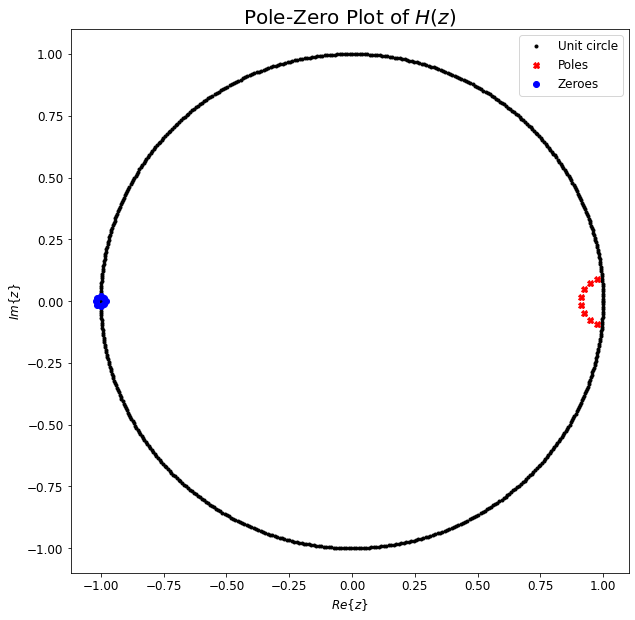

<Figure size 720x720 with 0 Axes>

In [207]:
plt.rcParams.update({
    "figure.figsize": (10,10),
    "font.size": 12})
zeros, poles, _ = sp.tf2zpk(bd, ad)

cir = np.arange(0, 2*np.pi, 0.01)

plt.plot(np.cos(cir), np.sin(cir), 'k.', label='Unit circle')
plt.plot(np.real(poles), np.imag(poles), 'rX', label='Poles')
plt.plot(np.real(zeros), np.imag(zeros), 'bo', label='Zeroes')
plt.legend()
plt.title(r'Pole-Zero Plot of $H(z)$',fontsize = 20)

plt.xlabel(r'$Re\{z\}$')
plt.ylabel(r'$Im\{z\}$')
plt.savefig('q1p1.png')
plt.figure()

Part 3:

<Figure size 864x432 with 0 Axes>

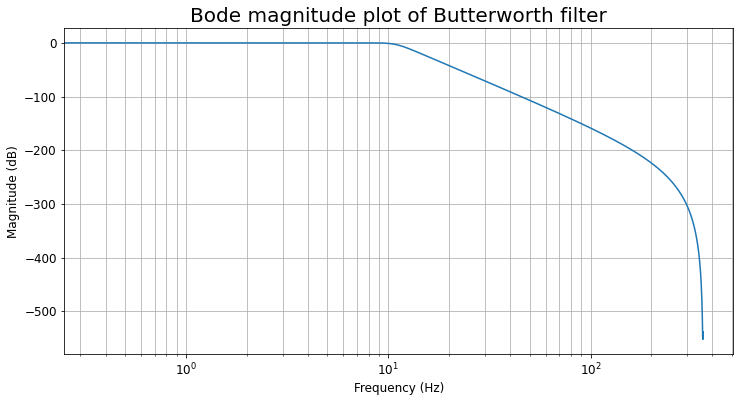

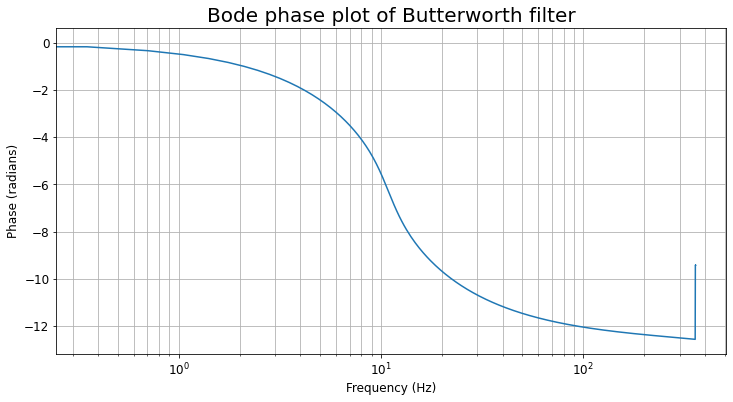

<Figure size 864x432 with 0 Axes>

In [208]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})
freqs, H = sp.freqz(bd, ad, 1024)

plt.semilogx(freqs*(Fs/(2*np.pi)), 20*np.log10(np.abs(H)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Bode magnitude plot of Butterworth filter',fontsize = 20)
plt.grid(True, which='both')
plt.savefig('q1p2.png')
plt.figure()

plt.semilogx(freqs*(Fs/(2*np.pi)), np.unwrap(np.angle(H)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Bode phase plot of Butterworth filter',fontsize = 20)
plt.grid(True, which='both', ls='-')
plt.savefig('q1p3.png')
plt.figure()

720


<Figure size 864x432 with 0 Axes>

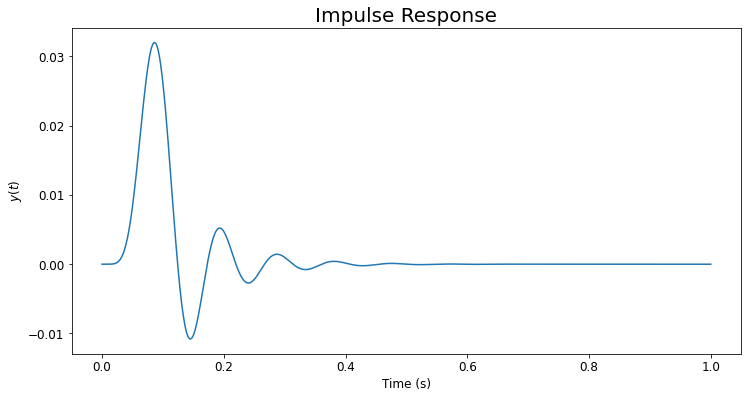

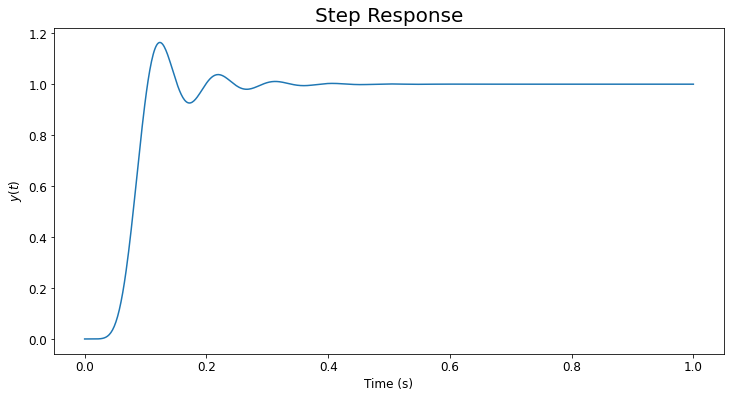

<Figure size 864x432 with 0 Axes>

In [209]:
t =np.linspace(0, 1, Fs)

print(len(t))
deltan=np.hstack((np.array([1]), np.zeros((Fs-1))))

yf_i = sp.lfilter(bd, ad, deltan)
plt.plot(t,yf_i)
plt.xlabel('Time (s)')
plt.ylabel(r'$y(t)$')
plt.title('Impulse Response',fontsize = 20)
plt.savefig('q1p4.png')
plt.figure()

un=np.ones((Fs))
yf_s = sp.lfilter(bd, ad, un)
plt.plot(t,yf_s)
plt.xlabel('Time (s)')
plt.ylabel(r'$y(t)$')
plt.title('Step Response',fontsize = 20)
plt.savefig('q1p5.png')
plt.figure()

# Problem 2

<Figure size 864x432 with 0 Axes>

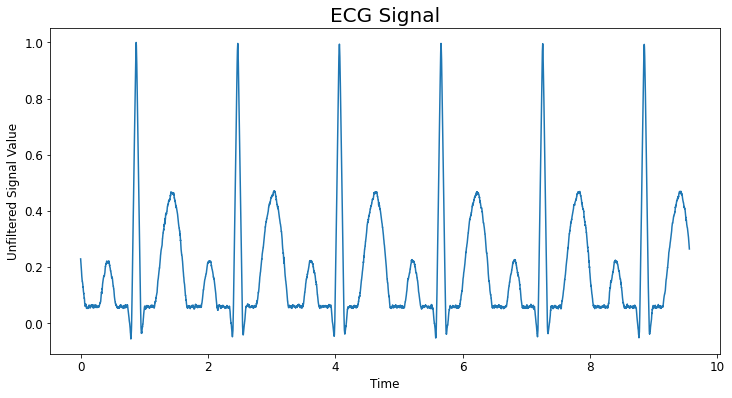

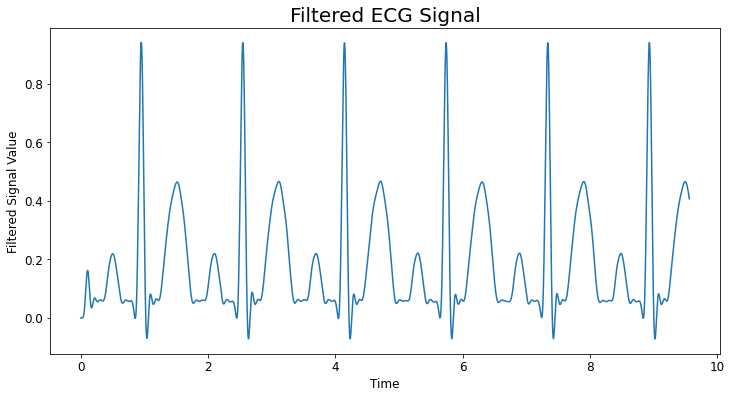

<Figure size 864x432 with 0 Axes>

In [210]:
Fs = 720
signal = np.loadtxt('ECG_Data.txt')

filtered_signal = sp.lfilter(bd, ad, signal)
t = np.arange(0, len(signal)/Fs, 1/Fs)

plt.plot(t,signal)
plt.title('ECG Signal',fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Unfiltered Signal Value')
plt.savefig('q2p1.png')
plt.figure()

plt.plot(t,filtered_signal)
plt.title('Filtered ECG Signal',fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Filtered Signal Value')
plt.savefig('q2p2.png')
plt.figure()

<Figure size 864x432 with 0 Axes>

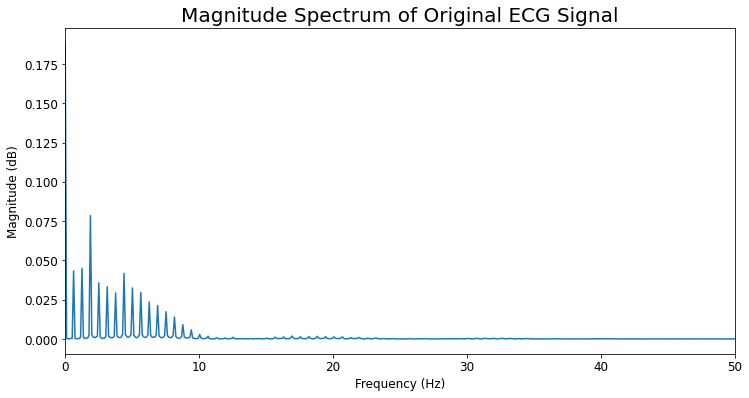

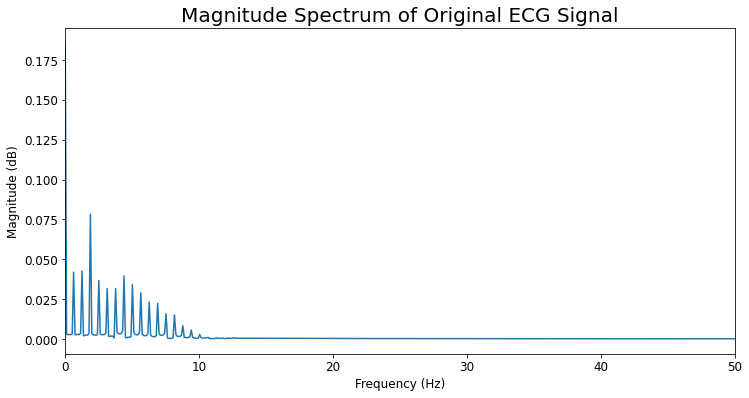

<Figure size 864x432 with 0 Axes>

In [211]:
fft_signal = fft(signal)/len(signal)
f = np.arange(len(signal)) * Fs / len(signal)
plt.plot(f, np.abs(fft_signal))
plt.title('Magnitude Spectrum of Original ECG Signal',fontsize = 20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim([0,50])
plt.savefig('q2p3.png')
plt.figure()

fft_filtered_signal = fft(filtered_signal)/len(filtered_signal)
f = np.arange(len(filtered_signal)) * Fs / len(filtered_signal)
plt.plot(f, np.abs(fft_filtered_signal))
plt.title('Magnitude Spectrum of Original ECG Signal',fontsize = 20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim([0,50])
plt.savefig('q2p4.png')
plt.figure()


# Problem 3

In [212]:
def spectrogram(y, Nos, fs, window=None, title=None,savfile = None):
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = plt.specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  plt.title(title, fontsize = 20)
  plt.xlabel(r'$Time(s)$', fontsize = 16)
  plt.ylabel(r'$Frequencies(Hz)$', fontsize = 16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  plt.clim(-150, -50)
  cbar.set_label(r'$Amplitude(dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  plt.tight_layout()
  plt.savefig(savfile)
  plt.figure()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Original Audio Signal


Filtered Audio Signal


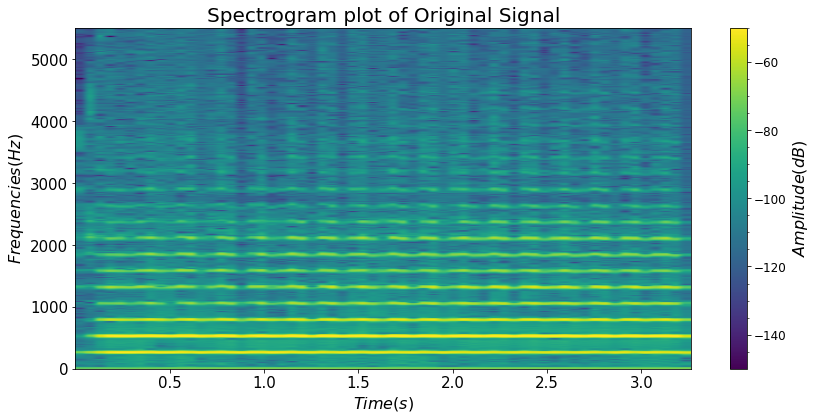

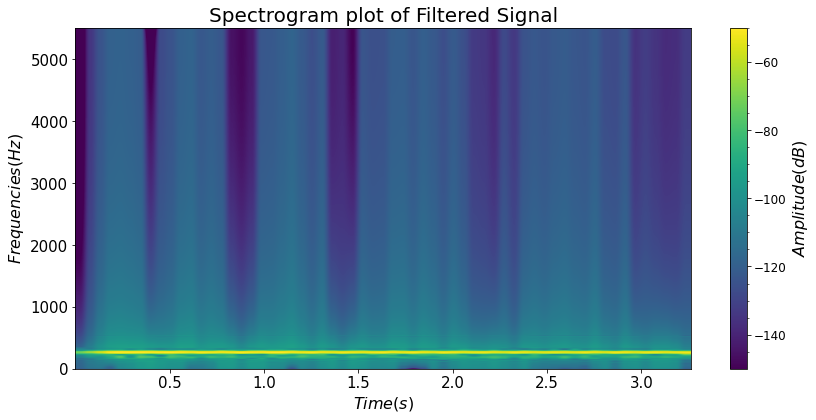

<Figure size 864x432 with 0 Axes>

In [213]:
Fs, signal=wavfile.read('instru1.wav')
signal = signal/32767

spectrogram(signal, 600, Fs, window='hamming', title=r'Spectrogram plot of Original Signal',savfile = 'q3p1.png')
#custom_spect(x, Fs, noverlap=500, nperseg=600, window='hamming', title=r'Spectrogram plot of Instrument Signal')

Wp = np.array([2 * np.pi * 200, 2 * np.pi * 300])
Ws = np.array([2 * np.pi * 100, 2 * np.pi * 400])

pass_ripple = alpha
stop_ripple = 40

wp = (2 * Fs) * np.tan(Wp/(2 * Fs))
ws = (2 * Fs) * np.tan(Ws/(2 * Fs))

N, wc = sp.buttord(wp, ws, pass_ripple, stop_ripple, analog=True)
b, a =  sp.butter(N, wc, btype='bandpass', analog=True, output='ba')
bd2, ad2=sp.bilinear(b, a, Fs)

y = sp.lfilter(bd2, ad2, signal)

wavfile.write('instrument_filtered.wav', Fs, (32767*y).astype(np.int16))

spectrogram(y, 600, Fs, window='hamming', title=r'Spectrogram plot of Filtered Signal',savfile = 'q3p2.png')
print('Original Audio Signal')
display(Audio(data=(32767*signal).astype(np.int16), rate=Fs))
print('Filtered Audio Signal')
display(Audio(data=(32767*y).astype(np.int16), rate=Fs))

In [214]:
X = fft(signal)
X = X/np.max(np.abs(X))
for i in range (len(X)):
  if (np.abs(X[i])<=0.1):
    X[i]=0;
  elif (i==0):
    X[i]=0 
peaks = sp.find_peaks(np.abs(X))[0] 
fundamental_frequency = (peaks[0]/len(X)) * Fs

X = fft(y)
X = X/np.max(np.abs(X))
for i in range (len(X)):
  if (np.abs(X[i])<=0.1):
    X[i]=0;
  elif (i==0):
    X[i]=0 
peaks = sp.find_peaks(np.abs(X))[0] 
fundamental_frequency_filter = (peaks[0]/len(X)) * Fs

print('Fundamental frequency of the instru1 audio signal: {} Hz'.format(fundamental_frequency))

print('Frequency of the filtered signal: {} Hz'.format(fundamental_frequency_filter))

Fundamental frequency of the instru1 audio signal: 256.69241379310347 Hz
Frequency of the filtered signal: 256.69241379310347 Hz


# Problem 4

In [215]:
Fs=720

Wp = 10*2*np.pi
Ws = 20*2*np.pi

pass_ripple = alpha
stop_ripple = 40

wp = (2/T) * np.tan(Wp/(Fs*2))
ws = (2/T) * np.tan(Ws/(Fs*2))

N, wc=sp.cheb1ord(wp, ws, pass_ripple, stop_ripple, analog=True)

print('Order filter: {}'.format(N))
print('Cutoff frequency (rad/sec): {}'.format(wc))

b, a = sp.cheby1(N, pass_ripple, wc, btype='low', analog=True, output='ba')

bd_c , ad_c =sp.bilinear(b, a, fs=Fs)


Order filter: 5
Cutoff frequency (rad/sec): 62.87175778825736


<Figure size 720x720 with 0 Axes>

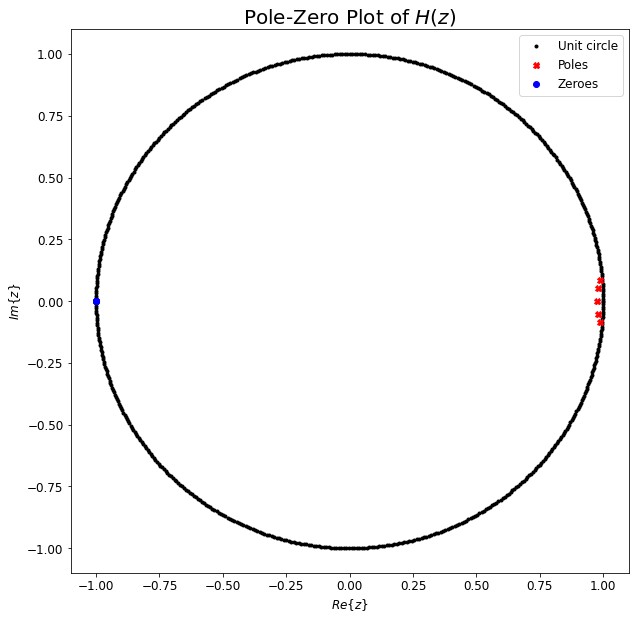

<Figure size 720x720 with 0 Axes>

In [216]:
plt.rcParams.update({
    "figure.figsize": (10,10),
    "font.size": 12})

zeros, poles, _ = sp.tf2zpk(bd_c , ad_c)

cir = np.arange(0, 2*np.pi, 0.01)

plt.plot(np.cos(cir), np.sin(cir), 'k.', label='Unit circle')
plt.plot(np.real(poles), np.imag(poles), 'rX', label='Poles')
plt.plot(np.real(zeros), np.imag(zeros), 'bo', label='Zeroes')
plt.legend()
plt.title(r'Pole-Zero Plot of $H(z)$',fontsize = 20)

plt.xlabel(r'$Re\{z\}$')
plt.ylabel(r'$Im\{z\}$')
plt.savefig('q4p1.png')
plt.figure()

<Figure size 864x432 with 0 Axes>

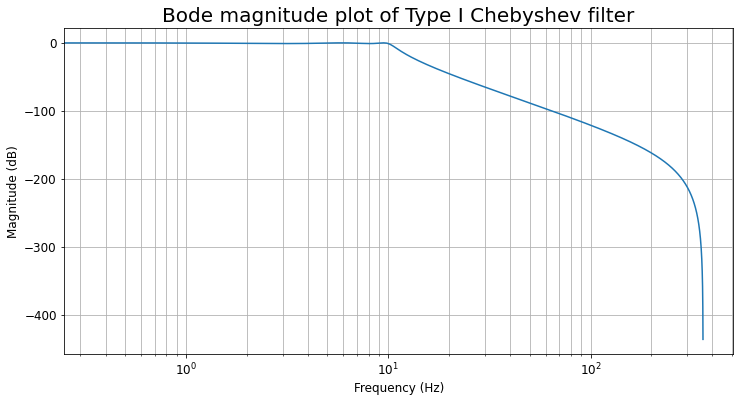

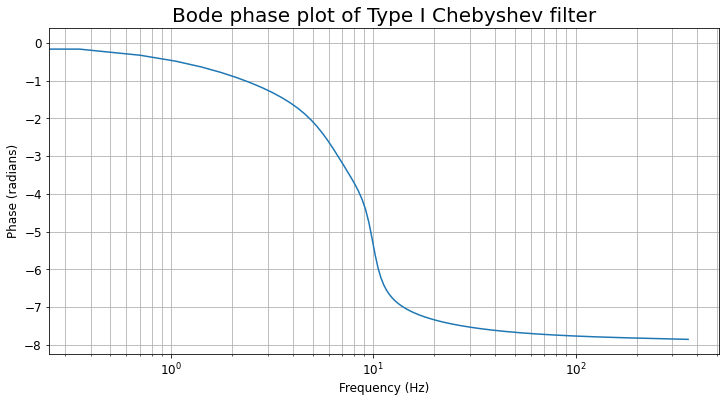

<Figure size 864x432 with 0 Axes>

In [217]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})
freqs, H = sp.freqz(bd_c, ad_c, 1024)

plt.semilogx(freqs*(Fs/(2*np.pi)), 20*np.log10(np.abs(H)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Bode magnitude plot of Type I Chebyshev filter',fontsize = 20)
plt.grid(True, which='both')
plt.savefig('q4p2.png')
plt.figure()

plt.semilogx(freqs*(Fs/(2*np.pi)), np.unwrap(np.angle(H)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Bode phase plot of Type I Chebyshev filter',fontsize = 20)
plt.grid(True, which='both', ls='-')
plt.savefig('q4p3.png')
plt.figure()

<Figure size 864x432 with 0 Axes>

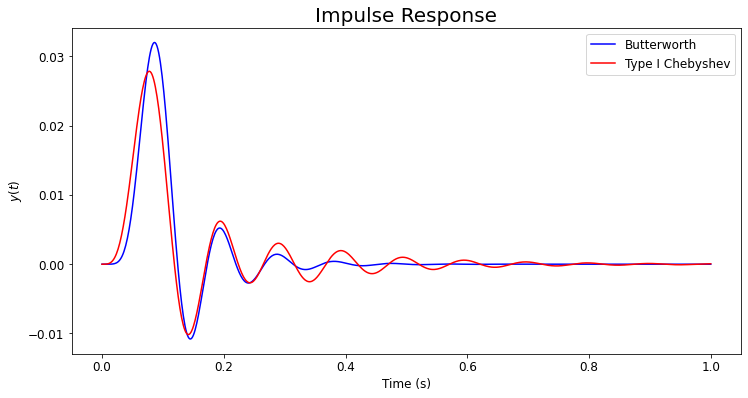

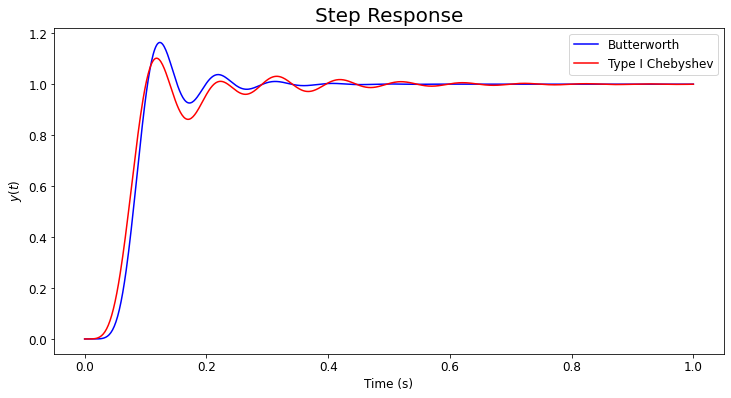

<Figure size 864x432 with 0 Axes>

In [218]:
t = np.linspace(0, 1, Fs)

deltan = np.hstack((np.array([1]), np.zeros((Fs-1))))

yf_i_b = sp.lfilter(bd, ad, deltan)
yf_i_c = sp.lfilter(bd_c, ad_c, deltan)
plt.plot(t,yf_i,color = 'b',label = 'Butterworth')
plt.legend()
plt.plot(t,yf_i_c,color = 'r',label = 'Type I Chebyshev')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel(r'$y(t)$')
plt.title('Impulse Response',fontsize = 20)
plt.savefig('q4p4.png')
plt.figure()

un=np.ones((Fs))
yf_s_b = sp.lfilter(bd, ad, un)
yf_s_c = sp.lfilter(bd_c, ad_c, un)
plt.plot(t,yf_s,color = 'b',label = 'Butterworth')
plt.legend()
plt.plot(t,yf_s_c,color = 'r',label = 'Type I Chebyshev')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel(r'$y(t)$')
plt.title('Step Response',fontsize = 20)
plt.savefig('q4p5.png')
plt.figure()